In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import mnist
import tensorflow as tf

from dcgan import DCGAN


Load the fashion-mnist data set and preprocess images (scale and flatten)

In [2]:
# load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = np.expand_dims(X_train, -1)

Look at a sample of the original images

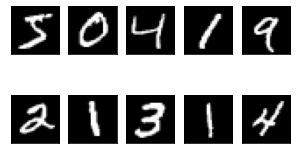

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(5, 3))
fig.patch.set_facecolor('white')
for indx, img in enumerate(X_train[:10]):
    img = img.reshape(28, 28)
    i, j = indx // 5, indx % 5
    ax[i, j].imshow(img, cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

Instantiate and train our DCGAN

Epoch 1: 100%|##########| 600/600 [05:37<00:00,  1.78it/s]


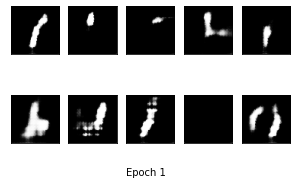

Epoch 2: 100%|##########| 600/600 [05:29<00:00,  1.82it/s]


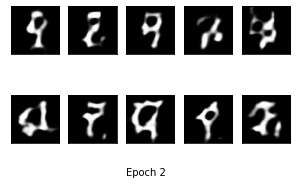

Epoch 3: 100%|##########| 600/600 [05:30<00:00,  1.82it/s]


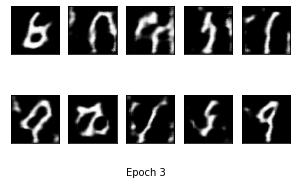

Epoch 4: 100%|##########| 600/600 [05:29<00:00,  1.82it/s]


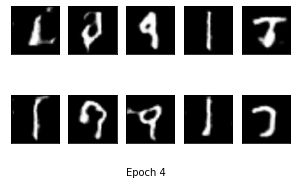

Epoch 5: 100%|##########| 600/600 [05:32<00:00,  1.80it/s]


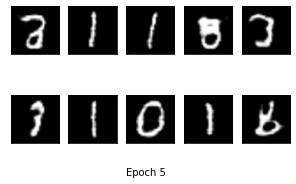

Epoch 6: 100%|##########| 600/600 [05:35<00:00,  1.79it/s]


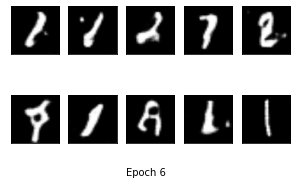

Epoch 7: 100%|##########| 600/600 [05:33<00:00,  1.80it/s]


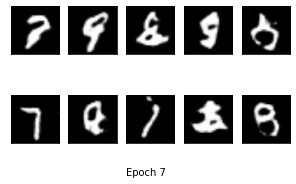

Epoch 8: 100%|##########| 600/600 [05:32<00:00,  1.80it/s]


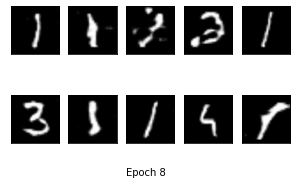

Epoch 9: 100%|##########| 600/600 [05:30<00:00,  1.81it/s]


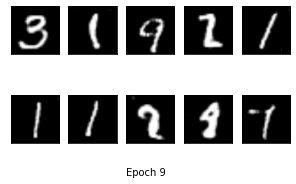

Epoch 10: 100%|##########| 600/600 [05:30<00:00,  1.81it/s]


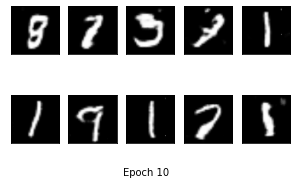

In [4]:
dcgan = DCGAN()

d_losses, g_losses = dcgan.train(X_train, 10, 100, verbose=1)

Plot the losses during training. The generator and discriminator losses should converge.

In [ ]:
plt.plot(range(1, 101), d_losses, label='disc. loss')
plt.plot(range(1, 101), g_losses, label='gen. loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

An interesting experiment is to generate a number of synthetic examples, and then see if a classifier trained on the original distrubution can label them. It seems to be able to recognize a fair number of them.

First, load a trained classifier

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Softmax

clf = load_model('fashion_mnist_classifier.h5')

Generate some new examples and see how the classifier labels them.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# generate new images. since they are returned as 1-D vectors, we 
# will need to reshape them for the classifier (which is a CNN)
images = dcgan.generate(10, None, display=False)
images = tf.image.resize(images, (28, 28))

# Predict the labels by the classifier
y_hat = clf.predict(images)
soft_max = Softmax()
probs = soft_max(y_hat)
labels = np.argmax(probs, axis=1)

# Display the results
fig, ax = plt.subplots(2, 5, figsize=(6, 4))
fig.patch.set_facecolor('white')
fig.tight_layout()
for indx in range(10):
    label = class_names[labels[indx]]
    prob = np.max(probs[indx])
    img = images[indx].reshape((28, 28))
    
    i, j = indx // 5, indx % 5
    ax[i, j].imshow(img, cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_xlabel(f'{prob * 100: .2f}%')
    ax[i,j].set_title(label)

